In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy

In [44]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from mpl_toolkits.mplot3d import axes3d

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 24})

In [4]:
from sample_3d_view import sample_sphere, sample_torus, visualize_grid_sphere, visualize_grid_torus, sample_ellipsoid

In [5]:
from local_pca_utils import make_nearest_neighbors_graph, make_tangents, make_2nd_order_laplacian,make_general_order_laplacian, make_connection

from curvature_utils import make_tangents_and_normals, get_second_fundamental_form

from tensorlaplacian_utils import get_riemannian_ricci_scalar, get_weitzenbock_operator, get_eigvals_of_weitzenbock

In [73]:
npoints = 10000

In [74]:
# Dataset definitions
#sphere = sample_sphere(npoints)


In [108]:
def choose_n_farthest_points(points, nb_points, seed=None):
    rdn_state = np.random if seed is None else np.random.RandomState(seed=seed)
    starting_point = rdn_state.choice(points.shape[0])
    out_points = np.array(gd.choose_n_farthest_points(
        points=points, nb_points=nb_points, starting_point=starting_point))
    return get_data_indices(out_points, points)

In [134]:
def genus_two(**kwargs):
    def solve_for_z(x, y):
        x, y = map(lambda x: np.array(x).astype('complex'), [x, y])
        return np.sqrt(
            0.01 - ((x**2 + y**2) ** 2 - .75*x**2 + .75*y**2)**2
        )
    aa = np.linspace(-1, 1, 200)
    xx, yy = np.meshgrid(aa, aa)
    xx = xx.flatten()
    yy = yy.flatten()
    zz = solve_for_z(xx, yy)
    ix_on_surface = np.isreal(zz)

    data_pos = np.vstack([
        xx[ix_on_surface],
        yy[ix_on_surface],
        np.real(zz[ix_on_surface]),
    ]).T

    data_neg = np.vstack([
        xx[ix_on_surface],
        yy[ix_on_surface],
        -np.real(zz[ix_on_surface]),
    ]).T
    data = np.vstack([data_pos, data_neg])
    #chosen_ix = choose_n_farthest_points(data, 1500, 42)
    data_orig = data[:]
    return data_orig

In [139]:
data = genus_two()

In [140]:
data.shape

(21880, 3)

In [141]:
data*=10

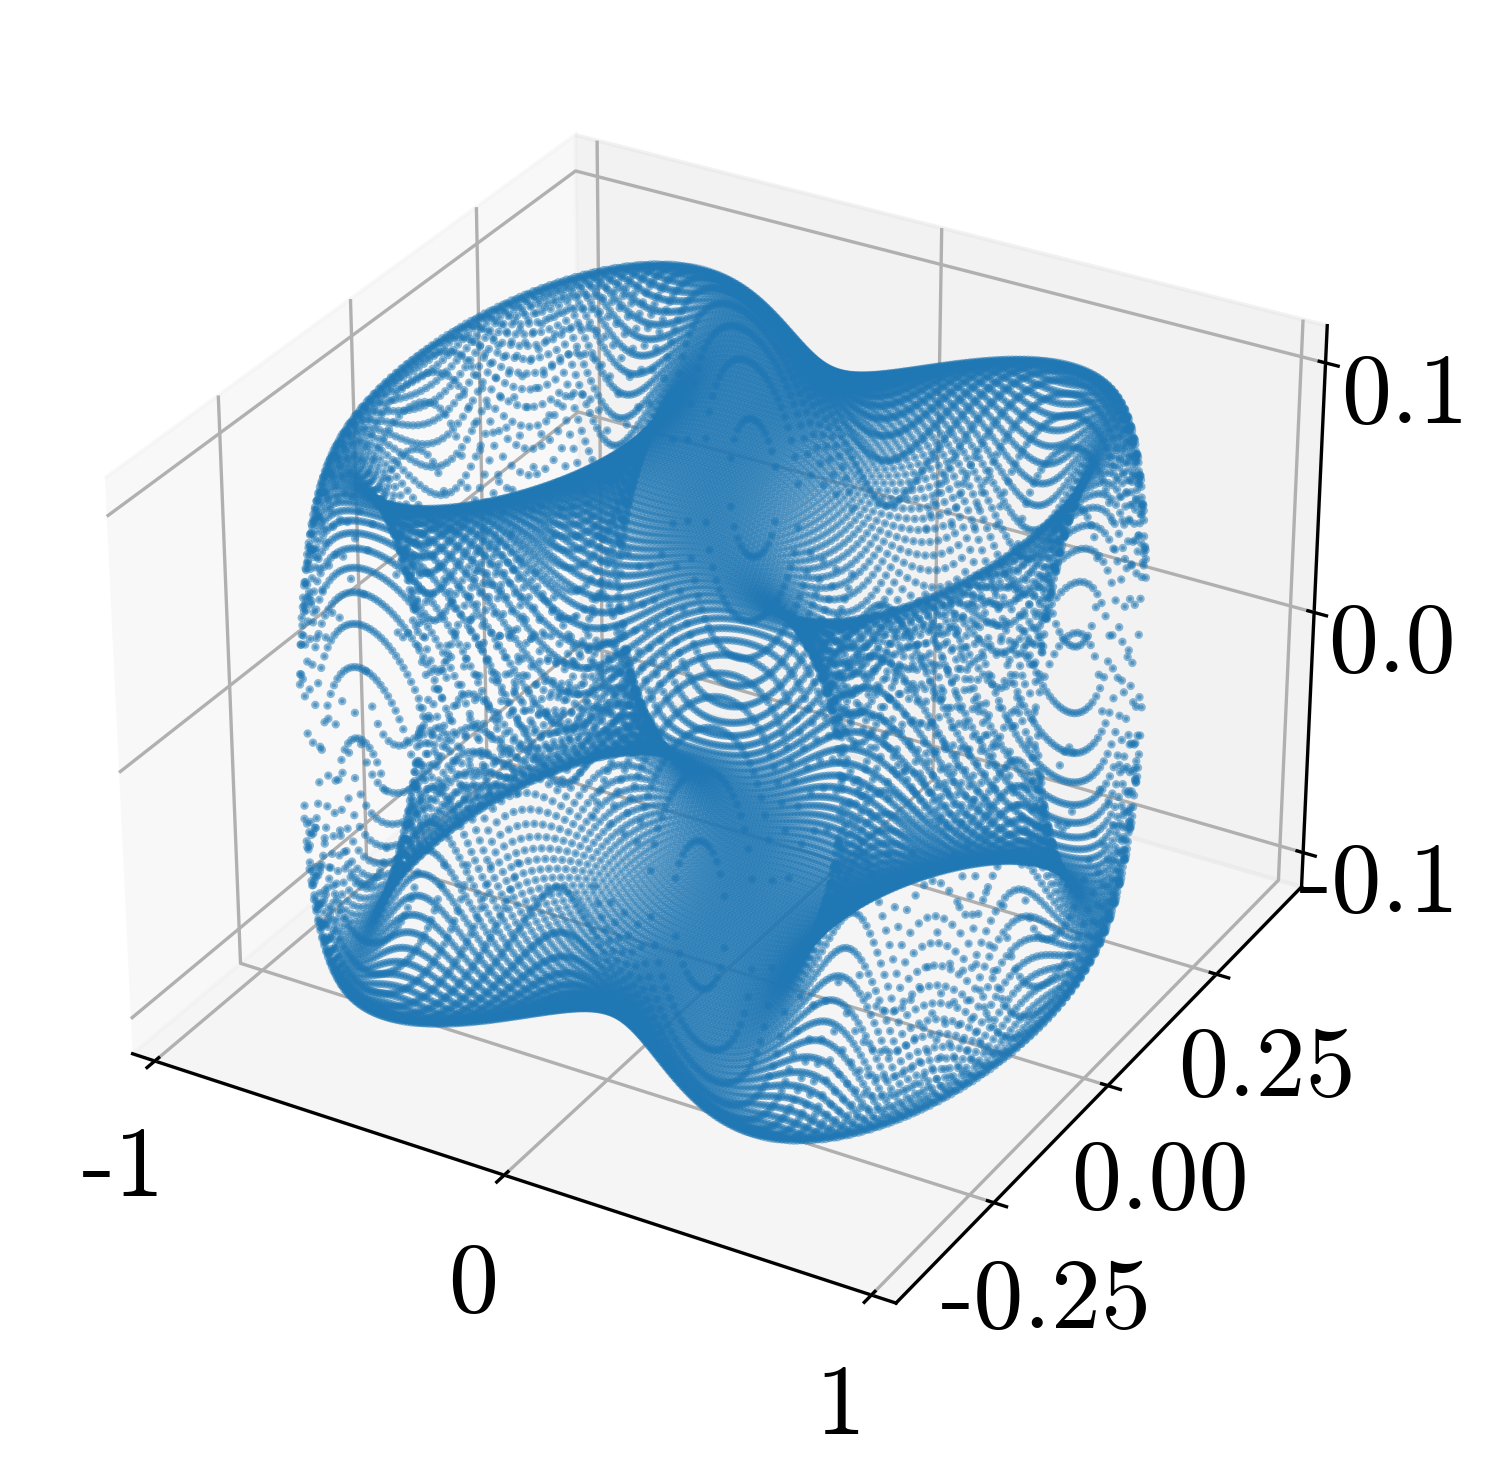

In [142]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})
#ax.set_box_aspect([2,2,1])
#fig, ax = visualize_grid_torus(30,2,1)
#ax.scatter(data[:,0], data[:, 1], data[:,2], s=1, c=sc, cmap='viridis',zorder=10, alpha=0.5)
ax.scatter(a[:,0], a[:, 1], a[:,2], s=1, zorder=10, alpha=0.5)
#ax.view_init(20, 40)
#ax.view_init(20, 100)


In [ ]:
data = np.loadtxt('bunny2.txt')
#data = data[:, [0, 2, 1]]
data *= 10
np.random.shuffle(data)
npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 60, n=35947)

In [180]:
npoints = 20000
data = sample_torus(npoints,3,1)
#graph = make_nearest_neighbors_graph(data, 20, n=22998)
#data= sample_ellipsoid(npoints,4,2,2)
#data = sample_sphere(npoints)
#npoints = data.shape[0]
graph = make_nearest_neighbors_graph(data, 10, n=npoints)
_,_,_,_, h = get_second_fundamental_form(data, graph, 2)
riem, ric, sc = get_riemannian_ricci_scalar(h)


100%|██████████| 20000/20000 [00:05<00:00, 3868.57it/s]


In [181]:
weitzenbock = get_weitzenbock_operator(riem, 2, 2)

In [182]:
weitzenbock.shape

(20000, 4, 4)

In [183]:
sorted_eig = get_eigvals_of_weitzenbock(weitzenbock, 2,2 )

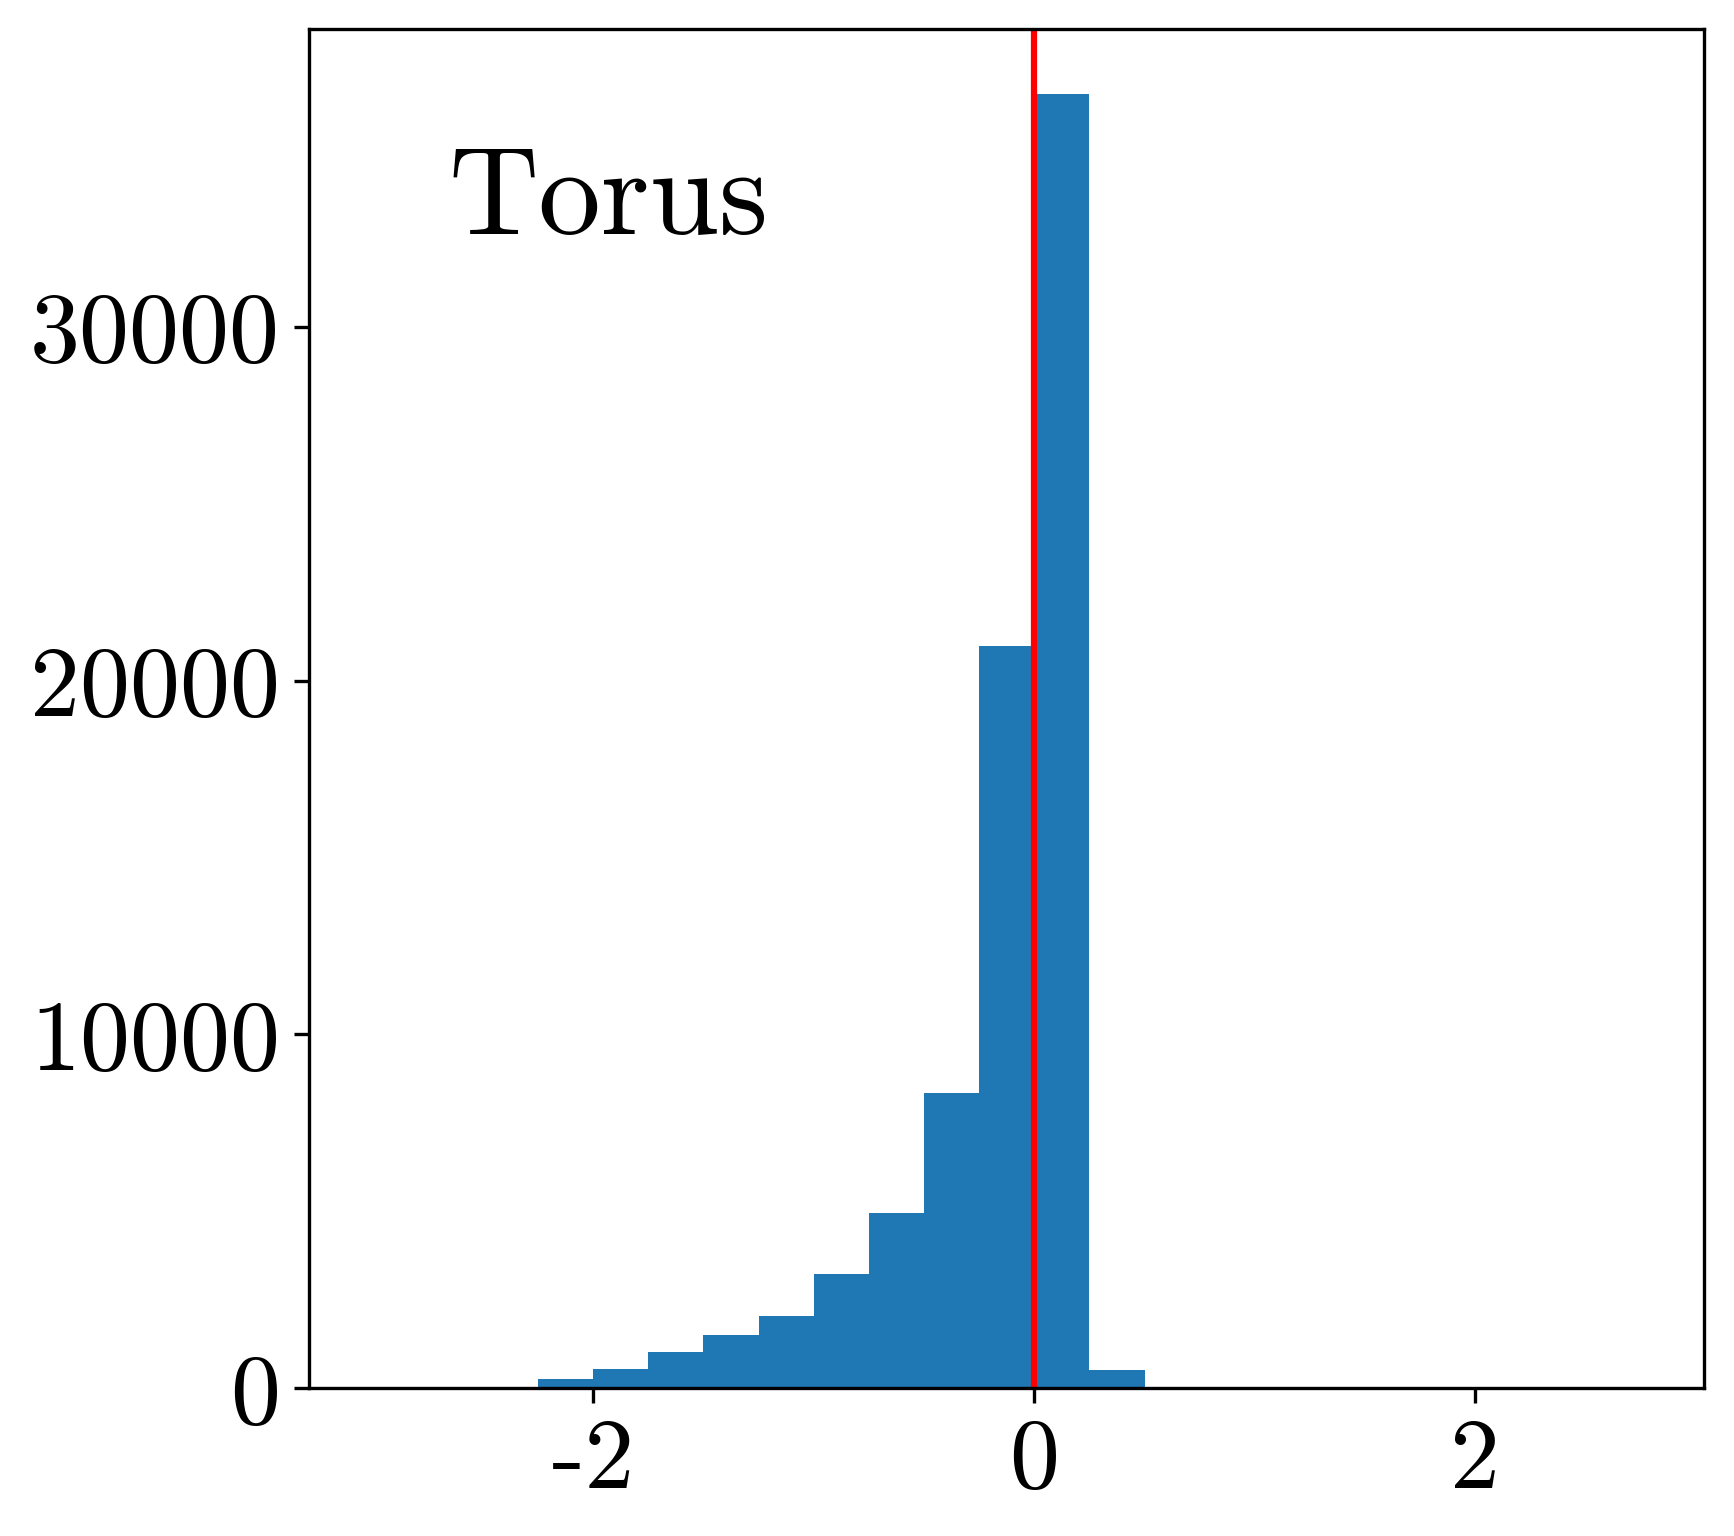

In [187]:
fig, ax = plt.subplots()
ax.hist(sorted_eig, bins = np.arange(-3,3,.25))
#ax.text(0.15,0.85, r"$S^2$", transform=ax.transAxes, fontsize=30)
ax.text(0.1,0.85, r"Torus", transform=ax.transAxes, fontsize=30)
#ax.text(0.1,0.78, r"surface", transform=ax.transAxes, fontsize=30)

ax.axvline(0, color='r')
fig.savefig(f'../figures/weitzenbock_eigenvals_torus.png')    
fig.savefig(f'../figures/weitzenbock_eigenvals_torus.pdf')


#plt.hist(sorted_eig, bins = np.arange(-3,3,.3));

In [84]:
data_s2 = sample_sphere(npoints)
data_s2 *= 10
s2_graph = make_nearest_neighbors_graph(data_s2, 10, n=npoints)
#s2_tangents, s2_normals, local_coords, s2triu, s2_h = get_second_fundamental_form(data_s2, s2_graph, 2)
_,_,_,_, s2_h = get_second_fundamental_form(data_s2, s2_graph, 2)

Riem, Ric, Scal = get_riemannian_ricci_scalar(s2_h)


100%|██████████| 20000/20000 [00:05<00:00, 3794.00it/s]


In [85]:
weitzenbock = get_weitzenbock_operator(Riem,2,2)
sorted_eig = get_eigvals_of_weitzenbock(weitzenbock, 2, 2)

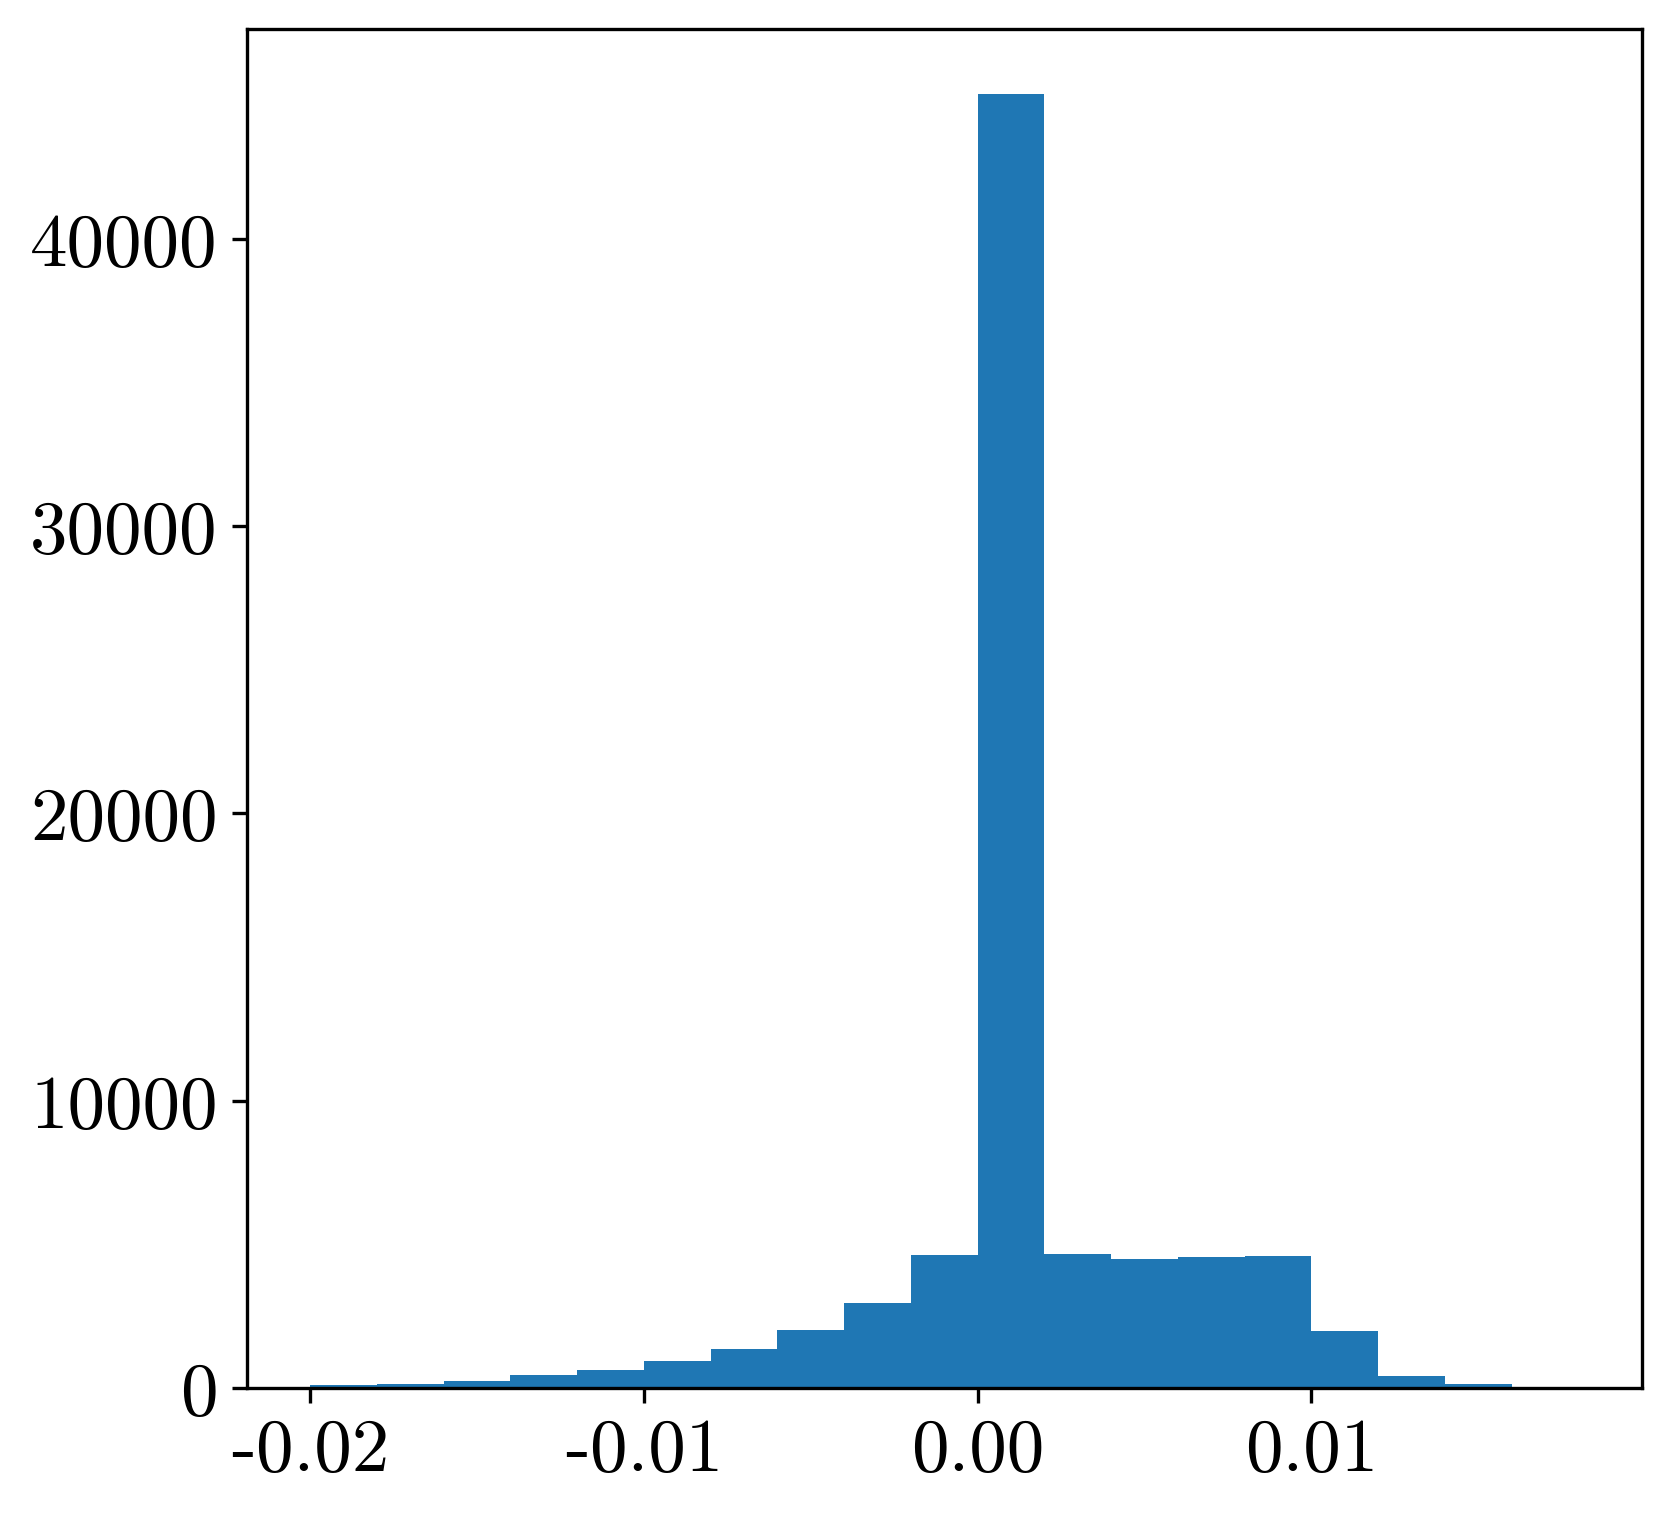

In [94]:
plt.hist(sorted_eig, bins = np.arange(-.02,.02,0.002));

In [95]:
data_t = sample_torus(npoints,2,1)
t_graph = make_nearest_neighbors_graph(data_t, 20, n=npoints)

100%|██████████| 20000/20000 [00:02<00:00, 7236.66it/s]


In [ ]:
vase = np.loadtxt('vase.txt')
vase_graph = make_nearest_neighbors_graph(vase, 60, n=10692)
_,_,_,_, vase_h = get_second_fundamental_form(vase, vase_graph, 2)
riem, ric, sc = get_riemannian_ricci_scalar(vase_h)

In [ ]:
verts = np.load('bunny.npy')
verts*=1000
bunny_graph = make_nearest_neighbors_graph(verts, 6, n=14904)
_,_,_,_, bunny_h = get_second_fundamental_form(verts, bunny_graph, 2)